##  PCA 이상 탐지(차원축소, 시각화 기반 이상탐지)
___
* 정의
```
# 여러 변수 간에 존재하는 상관관계를 이용하여 이를 대표한 주성분을 추출해 차원을 축소하는 기법
# 기존 데이터의 유실을 최소하 하기 위해 데이터의 분산을 최대화 할 수 있는 초평면(Hyper plane)을 찾고 데이터를 투영함
# 다중공선성(변수중 상관관계가 높아 각 변수의 특성을 잘 알 수 없는 것)을 제거하기 위해 각 벡터의 축이 직각(상관관계 없도록)이 되도록 투영 시킴
# 원본 데이터의 Feature 개수에 비해 매우 적은 주성분으로 원본 데이터의 총 변동성을 대부분 설명할 수 있는 분석법, 연산량을 줄여줌.
```
<img src = "https://drive.google.com/uc?id=16dNJTSMUiFmk4wQtJ7hP3HmL0wUy1vgP">

* 장단점
```
  # [good] 고차원에 데이터를 저차원에 주성분으로 표현할 수 있음
  # [good] 선택한 변수들의 해석이 용이함
  # [bad] 변수간 상관관계 고려가 어려움 
  # [bad] 추출된 변수의 해석이 어려움 (※ 주성분, PC1/PC2 ...)
```
  
* 사용방법
```
# from sklearn.decomposition import PCA
# 데이터 정규화 필수
# 학습 데이터셋에서 분산이 최대인 축(axis)을 탐색
# 이렇게 찾은 첫번째 축과 직교(orthogonal)하면서 분산이 최대인 두 번째 축을 탐색
# 첫 번째 축과 두 번째 축에 직교하고 분산을 최대한 보존하는 세 번째 축을 탐색
# 1~3과 같은 방법으로 데이터셋의 차원(특성 수)만큼의 축을 탐색
```

* 현업사례
```
# 다양한 검사 공정에서 이상 제품 탐지
# 데이터 EDA를 통한 클러스터링
```


### 실습
___

In [1]:
# iris 데이터세트
#from sklearn.datasets import load_iris
#iris = load_iris()
#df = pd.DataFrame(data= np.c_[iris.data, iris.target] , 
#                  columns= ['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])
import seaborn as sns
import pandas as pd
df=sns.load_dataset('iris')

In [2]:
# ▶ Data 확인 
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline  # 전처리할때 한꺼번에 하려고 파이프라인 구축

# ▶ Create scaler: scaler
scaler = StandardScaler()

# ▶ Create a PCA instance: pca
pca = PCA()

# ▶ Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

pipeline.fit(df.drop(['species'], axis=1))

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [6]:
print(pca.n_components_)

4


In [7]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [8]:
# ▶ pca.n_components_(차원 축소 주성분 개수)
features = range(pca.n_components_)
feature_df=pd.DataFrame(data=features,columns=['pc_feature'])

# ▶ pca.explained_variance_ratio_(설명력)
variance_df=pd.DataFrame(data=pca.explained_variance_ratio_,columns=['variance'])
pc_feature_df=pd.concat([feature_df,variance_df],axis=1)
pc_feature_df

# ▶ PC0, PC1으로도 전체 분산에 95% 이상 설명 가능

,pc_feature,variance
0,0,0.729624
1,1,0.228508
2,2,0.036689
3,3,0.005179


In [12]:
pc

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [13]:
pc_df

,PC1,PC2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa
...,...,...,...
145,1.870503,0.386966,virginica
146,1.564580,-0.896687,virginica
147,1.521170,0.269069,virginica
148,1.372788,1.011254,virginica


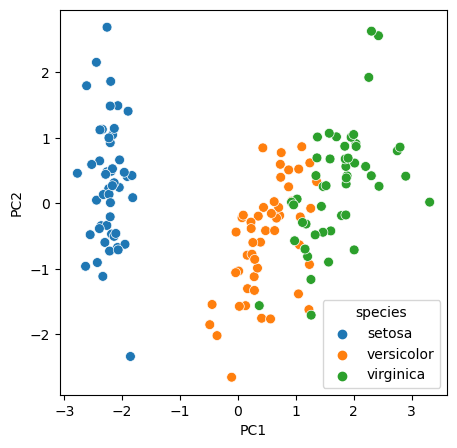

In [14]:
import matplotlib.pyplot as plt
#import seaborn as sns
#%matplotlib inline
#plt.style.use(['dark_background'])

x=df.drop(['species'], axis=1)
y=df['species']

# ▶ 정규화
X_ = StandardScaler().fit_transform(x)

# ▶ 2개의 주성분으로 차원 축소
pca = PCA(n_components=2)
pc = pca.fit_transform(X_)


pc_df=pd.DataFrame(pc,columns=['PC1','PC2']).reset_index(drop=True)
pc_df=pd.concat([pc_df,y],axis=1)

plt.rcParams['figure.figsize'] = [5, 5]
sns.scatterplot(data=pc_df,x='PC1',y='PC2',hue=y, legend='brief', s=50, linewidth=0.5);

# ▶ 각 클러스터 중심에서 멀리 떨어진 Data 일 수록 이상치, 마할라노비스 거리를 추가로 계산해도 됨. threshold 설정하는 방법도 있음.

##  t-SNE 이상 탐지(차원축소, 시각화 기반 이상탐지)
___
* 정의
```
# PCA는 선형 분석 방식으로 값을 투영하기 때문에 차원이 감소되면서 군집화 되어 있는 데이터들이 밀집되어 구별하기 어려운 단점
# 상위의 단점을 보완하기 위한 차원 감소 방법 t-SNE
# t-분포를 사용하여 데이터 유사도를 계산하므로, 꼬리가 두꺼운(분산이 큰) t-분포에서는 유사도(similarity)가 낮은 데이터일 수록  
더 멀리 떨어뜨리는 효과 발생(정규분포에 비해)
# 유사도(similarity)가 비슷한 데이터끼리 묶어줌
# t-분포를 이용하여 기준점과 상대점과의 거리를 기준으로 t-분포의 확률분포를 유사도(similarity)로 사용하여 표현
# 주로 시각화 Tool로 사용, PCA로 구분되지 않는 경우 활용 가능
```
<img src = "https://drive.google.com/uc?id=1fiwBO7-GG0SuHmkrXYS36WXodGhWfRVN" width="300" height="270">
<img src = "https://drive.google.com/uc?id=1xuiR2Yhc1YgXNHdOFpSU5GsxJqdCEwjp" width="500" height="270">


* 장단점
```
  # [good] PCA 대비 조금 더 고차원에 데이터를 저차원에 데이터로 클러스터링 하는데 유리 (※ 군집이 중복되지 않는 효과)
  # [good] 사용하기 쉬움
  # [good] 비선형 관계의 데이터를 군집화 할 수 있음
  # [bad] 데이터의 개수가 많을 수록 연산량이 증가함
  # [bad] 매번 돌릴 때마다 다른 시각화 결과가 도출됨
```
  
* 사용방법
```
# from sklearn.manifold import TSNE
# 데이터 정규화 필수
# Hyper parameter 선정
# 시각화 및 클러스터링
```

* 현업사례
```
# 다양한 검사 공정에서 이상 제품 탐지
# 데이터 EDA를 통한 클러스터링
```


### 실습
___

In [8]:
import seaborn as sns
import pandas as pd
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
from sklearn.manifold import TSNE

# ▶ class target 정보 제외
train_df = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# ▶ 2차원 t-SNE 임베딩
# - n_components : 차원 수
# - perplexity : 주변 이웃 데이터 참조 개수
# - learning_rate : 학습률, 크면 너무 붙어있게 되고 작으면 너무 멀어짐(특징X)
# - n_iter : 최적화 반복 횟수
tsne_np = TSNE(n_components = 2).fit_transform(train_df)

# ▶ numpy array -> DataFrame 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])
tsne_df

,component 0,component 1
0,-23.875437,-1.430589
1,-21.332832,-2.522965
2,-21.183956,-1.316485
3,-20.842545,-1.611920
4,-23.845785,-0.945733
...,...,...
145,15.408048,-1.407380
146,12.035444,-1.459038
147,14.410233,-1.398059
148,15.347630,-3.389599


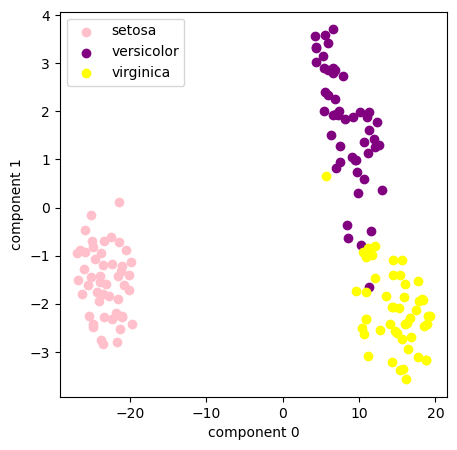

In [18]:
import matplotlib.pyplot as plt

# ▶ class target 정보 불러오기 
tsne_df['target'] = df['species']

# ▶ target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == 'setosa']
tsne_df_1 = tsne_df[tsne_df['target'] == 'versicolor']
tsne_df_2 = tsne_df[tsne_df['target'] == 'virginica']

# ▶ target 별 시각화
plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], color = 'pink', label = 'setosa')
plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], color = 'purple', label = 'versicolor')
plt.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], color = 'yellow', label = 'virginica')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()

In [19]:
# ▶ 3차원 t-SNE 임베딩
tsne_np = TSNE(n_components = 3).fit_transform(train_df)

# ▶ numpy array -> DataFrame 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1', 'component 2'])
tsne_df

,component 0,component 1,component 2
0,-26.533897,45.716568,-9.819800
1,-55.721172,24.290920,12.398039
2,-32.218525,28.902399,24.453581
3,-34.480396,-3.122183,31.611584
4,-11.582963,39.515251,-3.913848
...,...,...,...
145,48.679161,7.824016,16.280586
146,40.068836,-23.984703,-20.779505
147,44.114338,-3.671464,2.509907
148,72.106171,12.165637,-0.078569


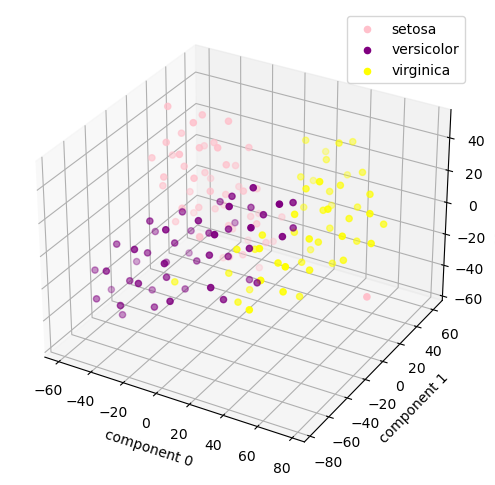

In [20]:
from mpl_toolkits.mplot3d import Axes3D

# ▶ 3차원 그래프 세팅
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

# ▶ class target 정보 불러오기 
tsne_df['target'] = df['species']

# ▶ target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == 'setosa']
tsne_df_1 = tsne_df[tsne_df['target'] == 'versicolor']
tsne_df_2 = tsne_df[tsne_df['target'] == 'virginica']

#  ▶ target 별 시각화
ax.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], tsne_df_0['component 2'], color = 'pink', label = 'setosa')
ax.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], tsne_df_1['component 2'], color = 'purple', label = 'versicolor')
ax.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], tsne_df_2['component 2'], color = 'yellow', label = 'virginica')

ax.set_xlabel('component 0')
ax.set_ylabel('component 1')
ax.set_zlabel('component 2')
ax.legend()
plt.show()

### titanic 데이터 활용 PCA, t-SNE

In [71]:
data=sns.load_dataset('titanic')

In [73]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [75]:
df = data.drop(["survived"], axis=1)
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [76]:
df.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class',
       'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'],
      dtype='object')

In [77]:
df = df[['pclass', 'age', 'sibsp', 'parch', 'fare']]

In [51]:
df

,pclass,age,sibsp,parch,fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
...,...,...,...,...,...
886,2,27.0,0,0,13.0000
887,1,19.0,0,0,30.0000
888,3,NaN,1,2,23.4500
889,1,26.0,0,0,30.0000


In [80]:
df.isnull().sum()

pclass      0
age       177
sibsp       0
parch       0
fare        0
dtype: int64

In [81]:
df = df[['pclass', 'sibsp', 'parch', 'fare']]

In [82]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline  # 전처리할때 한꺼번에 하려고 파이프라인 구축

# ▶ Create scaler: scaler
scaler = StandardScaler()

# ▶ Create a PCA instance: pca
pca = PCA()

# ▶ Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

pipeline.fit(df)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [83]:
# ▶ pca.n_components_(차원 축소 주성분 개수)
features = range(pca.n_components_)
feature_df=pd.DataFrame(data=features,columns=['pc_feature'])

# ▶ pca.explained_variance_ratio_(설명력)
variance_df=pd.DataFrame(data=pca.explained_variance_ratio_,columns=['variance'])
pc_feature_df=pd.concat([feature_df,variance_df],axis=1)
pc_feature_df

# ▶ PC0, PC1으로도 전체 분산에 95% 이상 설명 가능

,pc_feature,variance
0,0,0.413008
1,1,0.343228
2,2,0.145322
3,3,0.098441


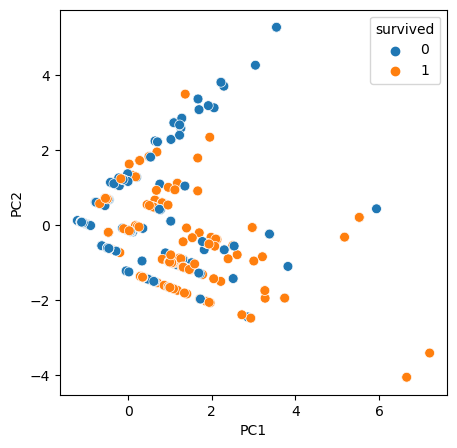

In [84]:
x=df
y=data['survived']

# ▶ 정규화
X_ = StandardScaler().fit_transform(x)

# ▶ 2개의 주성분으로 차원 축소
pca = PCA(n_components=2)
pc = pca.fit_transform(X_)


pc_df=pd.DataFrame(pc,columns=['PC1','PC2']).reset_index(drop=True)
pc_df=pd.concat([pc_df,y],axis=1)

plt.rcParams['figure.figsize'] = [5, 5]
sns.scatterplot(data=pc_df,x='PC1',y='PC2',hue=y, legend='brief', s=50, linewidth=0.5);

In [85]:
from sklearn.manifold import TSNE

# ▶ class target 정보 제외
train_df = df

# ▶ 2차원 t-SNE 임베딩
# - n_components : 차원 수
# - perplexity : 주변 이웃 데이터 참조 개수
# - learning_rate : 학습률, 크면 너무 붙어있게 되고 작으면 너무 멀어짐(특징X)
# - n_iter : 최적화 반복 횟수
tsne_np = TSNE(n_components = 2).fit_transform(train_df)

# ▶ numpy array -> DataFrame 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])
tsne_df

,component 0,component 1
0,-69.869186,-5.910625
1,51.290726,-42.209076
2,-56.590782,53.027531
3,25.424070,-59.698841
4,-35.540665,17.520294
...,...,...
886,13.550037,-6.491976
887,57.616074,28.506449
888,13.037391,66.001205
889,60.129978,28.517204


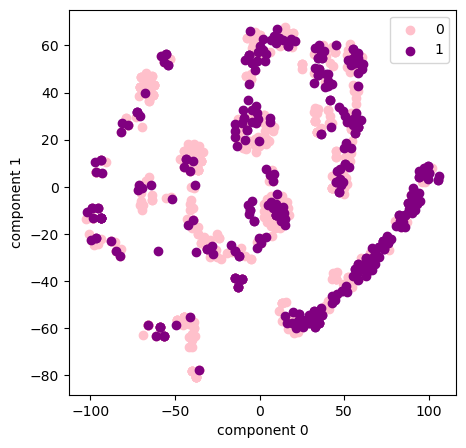

In [86]:
import matplotlib.pyplot as plt

# ▶ class target 정보 불러오기 
tsne_df['target'] = data['survived']

# ▶ target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1]

# ▶ target 별 시각화
plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], color = 'pink', label = 0)
plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], color = 'purple', label = 1)

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()

### 와인데이터 PCA

In [90]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [91]:
from sklearn.datasets import load_wine
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['class'] = wine.target

In [93]:
df.shape

(178, 14)

In [67]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline  # 전처리할때 한꺼번에 하려고 파이프라인 구축

# ▶ Create scaler: scaler
scaler = StandardScaler()

# ▶ Create a PCA instance: pca
pca = PCA()

# ▶ Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

pipeline.fit(df.drop(['class'], axis=1))

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [68]:
# ▶ pca.n_components_(차원 축소 주성분 개수)
features = range(pca.n_components_)
feature_df=pd.DataFrame(data=features,columns=['pc_feature'])

# ▶ pca.explained_variance_ratio_(설명력)
variance_df=pd.DataFrame(data=pca.explained_variance_ratio_,columns=['variance'])
pc_feature_df=pd.concat([feature_df,variance_df],axis=1)
pc_feature_df

# ▶ PC0, PC1으로도 전체 분산에 95% 이상 설명 가능

,pc_feature,variance
0,0,0.361988
1,1,0.192075
2,2,0.111236
3,3,0.070690
4,4,0.065633
5,5,0.049358
6,6,0.042387
7,7,0.026807
8,8,0.022222
9,9,0.019300


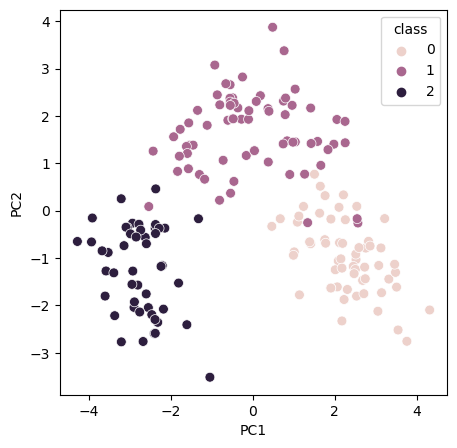

In [70]:
x=df.drop(['class'], axis=1)
y=df['class']

# ▶ 정규화
X_ = StandardScaler().fit_transform(x)

# ▶ 2개의 주성분으로 차원 축소
pca = PCA(n_components=2)
pc = pca.fit_transform(X_)


pc_df=pd.DataFrame(pc,columns=['PC1','PC2']).reset_index(drop=True)
pc_df=pd.concat([pc_df,y],axis=1)

plt.rcParams['figure.figsize'] = [5, 5]
sns.scatterplot(data=pc_df,x='PC1',y='PC2',hue=y, legend='brief', s=50, linewidth=0.5);

In [94]:
from sklearn.manifold import TSNE

# ▶ class target 정보 제외
train_df = df.drop(['class'], axis=1)

# ▶ 2차원 t-SNE 임베딩
# - n_components : 차원 수
# - perplexity : 주변 이웃 데이터 참조 개수
# - learning_rate : 학습률, 크면 너무 붙어있게 되고 작으면 너무 멀어짐(특징X)
# - n_iter : 최적화 반복 횟수
tsne_np = TSNE(n_components = 2).fit_transform(train_df)

# ▶ numpy array -> DataFrame 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])
tsne_df

,component 0,component 1
0,10.776262,-0.487612
1,10.432003,-0.650546
2,12.985907,-0.837710
3,15.823071,-0.589132
4,2.084576,-0.622652
...,...,...
173,2.049382,-1.025591
174,2.485284,-0.999561
175,5.089700,-0.840400
176,5.249944,-0.763763


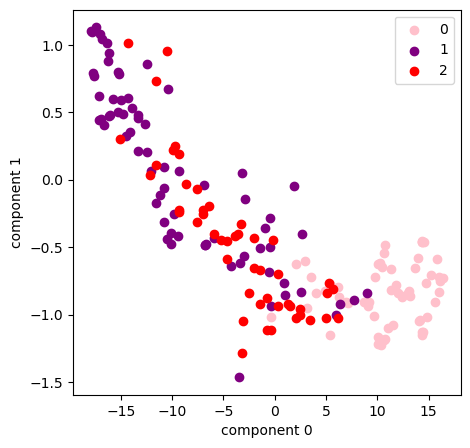

In [97]:
import matplotlib.pyplot as plt

# ▶ class target 정보 불러오기 
tsne_df['target'] = df['class']

# ▶ target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1]
tsne_df_2 = tsne_df[tsne_df['target'] == 2]

# ▶ target 별 시각화
plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], color = 'pink', label = 0)
plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], color = 'purple', label = 1)
plt.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], color = 'red', label = 2)

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()